# Read files

In [1]:
%%time

from antifraud import read_adj_dict_from_file, read_into_list_of_tuples
from graph_algorithms import Graph

# set file names
batch  = '../paymo_input/batch_payment.txt'
stream = '../paymo_input/stream_payment.txt'

# Read files
# Turn on verboisity to see the lines that did not conform to the csv format (Note: 
# it's the same 5 or so lines over and over again)
batch0 = read_adj_dict_from_file (batch, verbose = False)
stream = read_into_list_of_tuples (stream, verbose = False) 

# attach
batch = Graph (batch0)

CPU times: user 13.5 s, sys: 347 ms, total: 13.8 s
Wall time: 13.8 s


In [2]:
import time

In [3]:
start = time.time ()

In [5]:
adj = batch0.copy ()

In [6]:
%%time
# building degree 2 adjacent list
adj2 = {}
for key in adj.keys ():
    tmp = set ()
    for node in adj [key]:
        tmp.update (adj [node])
    tmp.discard (key)
    tmp.difference_update (adj [key])
    adj2 [key] = tmp

CPU times: user 17.4 s, sys: 1.06 s, total: 18.4 s
Wall time: 18.4 s


In [7]:
# For a random node, check number of other nodes separated by 2 degrees
import numpy.random as random

In [13]:
num_nodes = len (adj.keys ())
graph_keys = [0 for i in range (num_nodes)]
k = 0
for key in adj.keys ():
    graph_keys [k] = key
    k += 1

In [30]:


num_deg2 = [0 for i in range (num_nodes)]

for key in adj2.keys ():
    num_deg2 [len (adj2 [key])] += 1


In [32]:
num_deg2 [3:].index (0)

1467

In [ ]:
for k in range (10):
    print ('deg {:2}, num of other nodes: {}'.format (k, num_deg2 [k]))

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

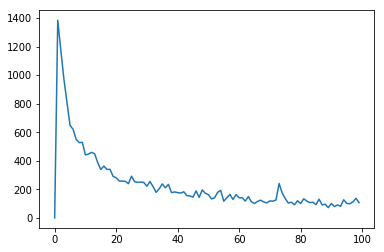

In [36]:
plt.plot (num_deg2 [:100])

## Find average degree of separation

In [43]:
from numpy.random import randint
num_nodes = len (adj.keys ())
graph_keys = [0 for i in range (num_nodes)]
k = 0
for key in adj.keys ():
    graph_keys [k] = key
    k += 1

In [122]:
%%time
num_unreachable = 0
total = 0
max_iter = 10000000
i, j = 0, 0
for k in range (max_iter):
    while i == j:
        i, j = randint (low = 0, high = num_nodes, size = (2))
        a, b = graph_keys [i], graph_keys [j]
        dist = batch.distance (a, b, 4)
    if dist > -1:
        total += dist
        print (a, b, dist, total)
    else:
        num_unreachable += 1
    
print ('percentage of pairs not connected: {}'
           .format (num_unreachable * 100.0 / max_iter))
print ('average distance between connected nodes: {}\n\n'
          .format (total / max_iter))

percentage of pairs not connected: 100.0
average distance between connected nodes: 0.0


CPU times: user 1.49 s, sys: 0 ns, total: 1.49 s
Wall time: 1.49 s


In [99]:
#

0

In [4]:
len (adj.keys ())

77360

In [10]:
1 / 774

0.0012919896640826874

In [ ]:
%%time
#building degree 3 adjacent list
adj3 = {}

k = 0
p = 0.0012919896640826874
for key in adj.keys ():
    tmp = set ()
    if k % 774 == 0:
        print ('\n{}% completed: {} / {}'.format (k * p, k, 77360))
    elif k % 77 == 0: 
        print ('**  ', end = '')
    k += 1
    
    dset = adj [key] | adj2 [key] | {key}
    for node in adj [key]:
        tmp.update (adj2 [node].difference (dset))
    adj3 [key] = tmp
    
# started at 8:16


0.0% completed: 0 / 77360
**  **  **  **  **  **  **  **  **  **  
1.0% completed: 774 / 77360
**  **  **  **  **  **  **  **  **  **  
2.0% completed: 1548 / 77360
**  **  **  **  **  **  **  **  **  **  
3.0% completed: 2322 / 77360
**  **  **  **  **  **  **  **  **  **  
4.0% completed: 3096 / 77360
**  **  **  **  **  **  **  **  **  **  
5.0% completed: 3870 / 77360
**  **  **  **  **  **  **  **  **  **  
6.0% completed: 4644 / 77360
**  **  **  **  **  **  **  **  **  **  
7.0% completed: 5418 / 77360
**  **  **  **  **  **  **  **  **  **  
8.0% completed: 6192 / 77360
**  **  **  **  **  **  **  **  **  **  
9.0% completed: 6966 / 77360
**  **  **  **  **  **  **  **  **  

In [ ]:
%%time
#building degree 3 adjacent list
adj3 = {}
for key in adj.keys ():
    tmp = set ()
    for node in adj [key]:
        tmp.update (adj2 [node])
    tmp.discard (key)
    tmp.difference_update (adj [key])
    tmp.difference_update (adj2 [key])
    adj3 [key] = tmp

In [2]:
%%time
batch.build_adj ()

CPU times: user 308 ms, sys: 24 ms, total: 332 ms
Wall time: 331 ms


In [3]:
%%time

batch.build_2nd_order_adj_lists ()

CPU times: user 15.4 s, sys: 1.05 s, total: 16.4 s
Wall time: 16.4 s


In [ ]:
%%time

batch.build_higher_order_adj_lists ()

In [ ]:
%%time

# Build the inclusive adjacency lists of degrees 2 & 4
batch.build_higher_order_adj_lists ()

In [6]:
%%time

batch.adj_2 = next_order_adj_list (batch.adj_1)

CPU times: user 21.8 s, sys: 1.12 s, total: 22.9 s
Wall time: 22.9 s


In [7]:
%%time
batch.is_self_consistent ()

CPU times: user 47.4 s, sys: 4.1 ms, total: 47.4 s
Wall time: 47.5 s


True

In [ ]:
%%time
batch.adj_3 = next_order_adj_list (batch.adj_2)

In [ ]:
%%time
batch.is_self_consistent ()

In [2]:
feature = batch.copy ()
feature is batch

False

In [4]:
feature.is_self_consistent ()

True

# Features

In [ ]:
for k in range (10):
    print (stream [k], 'distance: ', batch.distance (*stream [k], 4))

In [ ]:
%%time
dist = [-1 for i in range (len (stream))]

for k in range (len (stream)):
    dist [k] = batch.distance (*stream [k], 4)

In [ ]:
def msg_if_ltn (graph, edge, n, message, add_edge = False):
    """
    
    """
    # check if the edge = (a, b) 
    ltn = graph.distance_lt_n (*edge, n)
    if add_edge and not ltn:
        graph.add_edge (edge)
    return message [0] if ltn else message [1]

## Feature 1
When anyone makes a payment to another user, they'll be notified if they've never made a transaction with that user before.

"unverified: You've never had a transaction with this user before. Are you sure you would like to proceed with this payment?"

In [ ]:
%%time

feature = Graph (batch0.copy ())

msg_true = "verified"
msg_false = "unverified: You've never had a transaction with this user before. Are you sure you would like to proceed with this payment?"
end = '\n'
message = [msg_true + end,
           msg_false + end]
output_file = 'output1.txt'
n = 1

with open (output_file, 'w') as output:
    for edge in stream:
        output.write (msg_if_ltn (feature, edge, n, message, add_edge = True))
print ('number of new nodes: {}\n'.format (feature.length - batch.length))

In [ ]:
feature.length

## Feature 2

The PayMo team is concerned that these warnings could be annoying because there are many users who haven't had transactions, but are still in similar social networks. To account for this, PayMo would like you to also implement this feature. When users make a payment, they'll be notified when the other user is outside of their "2nd-degree network".

"unverified: This user is not a friend or a "friend of a friend". Are you sure you would like to proceed with this payment?"

In [ ]:
feature = Graph (batch0)
feature.length

In [ ]:
%%time

output_file = 'output2.txt'
n = 2

msg_true = "verified"
msg_false = 'unverified: This user is not a friend or a "friend of a friend". Are you sure you would like to proceed with this payment?'
end = '\n'
message = [msg_true + end,
           msg_false + end]


feature = Graph (batch0.copy ())

with open (output_file, 'w') as output:
    for edge in stream:
        output.write (msg_if_ltn (feature, edge, n, message, add_edge = True))
#        if feature.distance_lt_n (*edge, n):
#            output.write (msg_true + end)
#        else:
#            output.write (msg_false + end)
#            feature.add_edge (edge)
print ('number of new nodes: {}\n'.format (feature.length - batch.length))

In [ ]:
feature.distance (42402, 42402)

In [ ]:
feature.length

## Feature 3

More generally, PayMo would like to extend this feature to larger social networks. Implement a feature to warn users only when they're outside the "4th degree friends network."

In [ ]:
%%time
msg_true = "verified"
msg_false = 'unverified: This user is not a friend or a "friend of a friend". Are you sure you would like to proceed with this payment?'
output_file = 'output3.txt'
n = 4

start_length = feature.length
with open (output_file, 'w') as output:
    for edge in stream:
        for edge in stream:
        if feature.distance_lt_n (*edge, n):
            output.write (msg_true)
        else:
            output.write (msg_false)
            feature.add_edge (edge)
            
print ('number of new nodes: {}\n'.format (feature.length - start_length))